In [2]:
import numpy as np
import tensorflow as tf
from tensorflow. keras.preprocessing.image import load_img,img_to_array
import tensorflow.keras.backend as K
from tensorflow. keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow. keras.models import Sequential,Model,save_model,load_model
from tensorflow. keras.layers import Conv2D,Dense,Flatten;
from tensorflow. keras.regularizers import l2
from tensorflow. keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline


#Data Augmentation

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224,224),
                                                 batch_size =32,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(
        rescale=1./255,
        )
testing_set = test_datagen.flow_from_directory('test',
                                                 target_size = (224,224),
                                                 batch_size =32,
                                                 class_mode = 'categorical')

Found 2021 images belonging to 3 classes.
Found 502 images belonging to 3 classes.


#Importing VGG16 model

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
model =VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

2023-01-31 15:31:24.158075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
for layer in model.layers:
    layer.trainable = False 

#Adding custom layers

In [6]:
x= Flatten()(model.output);
x=Dense(units=1024,activation='relu')(x)
x=Dense(units=512,activation='relu')(x)
x =Dense(units=3,activation='softmax')(x)
final_model=Model(inputs =model.input,outputs=x)

#Early Stopping

In [7]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="min",
    restore_best_weights=True,
)

#Compiling the model

In [8]:
final_model.compile(loss='categorical_crossentropy',optimizer= Adam(1e-5),metrics=['accuracy']) 

#Training the model

In [20]:
history=final_model.fit(training_set,validation_data =testing_set,epochs=10,callbacks=[callback])

Epoch 1/10
64/64 [==============================] - 472s 7s/step - loss: 0.4905 - accuracy: 0.7996 - val_loss: 0.3919 - val_accuracy: 0.8347
Epoch 2/10
64/64 [==============================] - 472s 7s/step - loss: 0.4507 - accuracy: 0.8179 - val_loss: 0.4102 - val_accuracy: 0.8207
Epoch 3/10
64/64 [==============================] - 490s 8s/step - loss: 0.4425 - accuracy: 0.8283 - val_loss: 0.3592 - val_accuracy: 0.8606
Epoch 4/10
64/64 [==============================] - 472s 7s/step - loss: 0.4148 - accuracy: 0.8431 - val_loss: 0.3594 - val_accuracy: 0.8526
Epoch 5/10
64/64 [==============================] - 472s 7s/step - loss: 0.3794 - accuracy: 0.8669 - val_loss: 0.3931 - val_accuracy: 0.8386
Epoch 6/10
64/64 [==============================] - 473s 7s/step - loss: 0.4085 - accuracy: 0.8372 - val_loss: 0.3664 - val_accuracy: 0.8486
Epoch 7/10
64/64 [==============================] - 473s 7s/step - loss: 0.3822 - accuracy: 0.8560 - val_loss: 0.3369 - val_accuracy: 0.8725
Epoch 8/10
64

In [29]:
#with tf.device():
#  history=final_model.fit(training_set,validation_data =testing_set,epochs=50,callbacks=[callback])

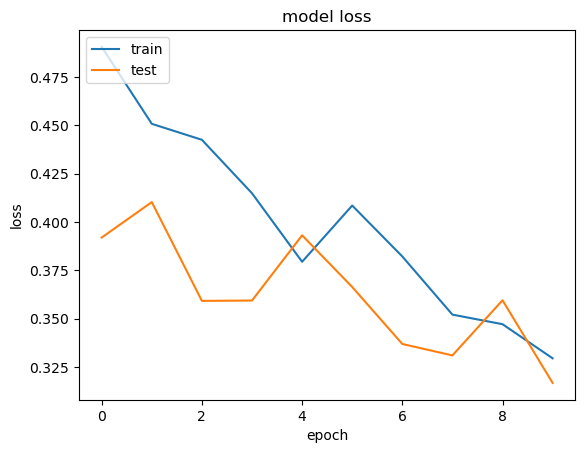

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#Saving the model

In [21]:

save_model(final_model,'final_model.h5')
final_model.save('final_model.h5')